In [5]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


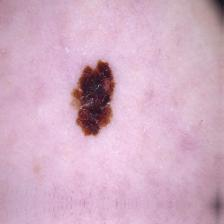

In [6]:
from IPython.display import Image
Image('/content/drive/MyDrive/SkinCancerDataset/DermMel/DermMel/test/Melanoma/AUG_0_1001.jpeg')

In [7]:
from tensorflow.keras.layers import Dense, Lambda, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from glob import glob
import cv2
import os

In [8]:
train=ImageDataGenerator(rescale=1./255)
test=ImageDataGenerator(rescale=1./255)

In [9]:
cv2.imread("/content/drive/MyDrive/SkinCancerDataset/DermMel/DermMel/test/Melanoma/AUG_0_1001.jpeg").shape

(224, 224, 3)

In [10]:
train_dataset=train.flow_from_directory("/content/drive/MyDrive/SkinCancerDataset/DermMel/DermMel/train_sep",
                                       target_size=(224,224),
                                       batch_size=20,
                                        class_mode='binary')
valid_dataset=train.flow_from_directory("/content/drive/MyDrive/SkinCancerDataset/DermMel/DermMel/valid",
                                       target_size=(224,224),
                                       batch_size=20,
                                        class_mode='binary')
test_dataset=train.flow_from_directory("/content/drive/MyDrive/SkinCancerDataset/DermMel/DermMel/test",
                                       target_size=(224,224),
                                       batch_size=20,
                                        class_mode='binary')

Found 10682 images belonging to 2 classes.
Found 3562 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.


In [ ]:
dn= DenseNet121(include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3),
    pooling='max',
    )

for layer in dn.layers:
  layer.trainable= False

model= Sequential()
model.add(dn)
model.add(Flatten())
model.add(Dense(800, activation= 'relu'))
model.add(Dense(120, activation= 'relu'))
model.add(Dense(84, activation= 'relu'))
model.add(Dense(1, activation= 'sigmoid'))

model.summary()

29089792/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1024)              7037504   
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 800)               820000    
_________________________________________________________________
dense_1 (Dense)              (None, 120)               96120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 85        
Total params: 7,963,873
Trainable params: 926,369
Non-tra

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer= 'adam',
              metrics=['accuracy', 'mae', 'mape'])

In [ ]:
model_fit = model.fit(train_dataset,
                    batch_size=32,
                    epochs=60,
                    verbose=1,  
                    validation_data=valid_dataset)

Epoch 1/60
535/535 [==============================] - 4192s 8s/step - loss: 0.3656 - accuracy: 0.8473 - mae: 0.2056 - mape: 102824489.2388 - val_loss: 0.1726 - val_accuracy: 0.9394 - val_mae: 0.1008 - val_mape: 51048168.0000
Epoch 2/60
535/535 [==============================] - 111s 207ms/step - loss: 0.1883 - accuracy: 0.9284 - mae: 0.1095 - mape: 54204700.9496 - val_loss: 0.1673 - val_accuracy: 0.9371 - val_mae: 0.0873 - val_mape: 52969084.0000
Epoch 3/60
535/535 [==============================] - 110s 206ms/step - loss: 0.1725 - accuracy: 0.9345 - mae: 0.1000 - mape: 50366089.8507 - val_loss: 0.1687 - val_accuracy: 0.9321 - val_mae: 0.0944 - val_mape: 55293772.0000
Epoch 4/60
535/535 [==============================] - 110s 205ms/step - loss: 0.1702 - accuracy: 0.9331 - mae: 0.1020 - mape: 51057451.3433 - val_loss: 0.2610 - val_accuracy: 0.9113 - val_mae: 0.1515 - val_mape: 28457456.0000
Epoch 5/60
535/535 [==============================] - 109s 205ms/step - loss: 0.1542 - accuracy: 

In [ ]:
model.save('DenseNet121.h5')

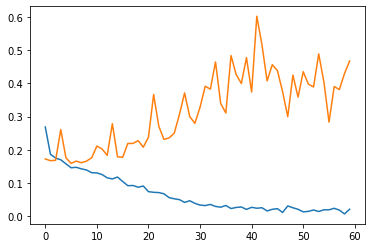

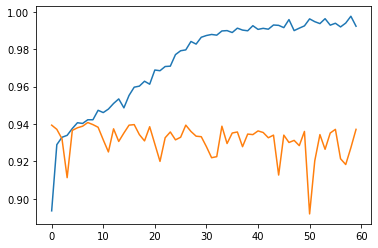

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(model_fit.history['loss'], label= 'train loss')
plt.plot(model_fit.history['val_loss'], label= 'val loss')
plt.legend
plt.show()
plt.savefig('lossVal_loss')

plt.plot(model_fit.history['accuracy'], label= 'train acc')
plt.plot(model_fit.history['val_accuracy'], label= 'val acc')
plt.legend
plt.show()
plt.savefig('AccVal_acc')